In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%reload_ext autoreload


Import required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

Ignoring Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')


Import modules

In [5]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preprocessing import PreProcess
from overview import Overview
from plot import Plot

In [6]:
pl = Plot()

Import the Data

In [7]:
# df = pd.read_excel('../data/Week1_challenge_data_source.xlsx')
df_org = pd.read_csv('../data/cleaned_data_outliers.csv')

In [8]:
df = df_org.copy()

In [9]:
overview = Overview(df)

Get Data overview

In [10]:
# Get data overview
df.head(3)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,0.996516,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,0.970502,0.822514,0.921154,0.938287,0.912787,0.988555,0.872215,0.945762,0.771197,0.778526
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,0.944446,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,0.989326,0.988470,0.982026,0.981643,0.974370,0.788814,0.962224,0.991811,0.886427,0.933206
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,0.944006,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,0.987317,0.967048,0.978865,0.904660,0.897724,0.702334,0.942217,0.882317,0.687728,0.758117


Data Exploration

In [11]:
df.shape
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [12]:
df.describe()

,bearer_id,start_ms,end_ms,dur._(ms),imsi,msisdn/number,imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,...,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,1.012045e+19,499.188199,498.800888,0.439023,2.082016e+14,4.182441e+10,4.842592e+13,-inf,-inf,-inf,...,0.923116,0.918437,0.924240,0.925019,0.921345,0.920386,0.919480,0.913696,0.792328,0.813121
std,2.892438e+18,288.610872,288.096693,0.131061,2.144723e+10,2.438731e+12,2.238739e+13,NaN,NaN,NaN,...,0.076958,0.081745,0.075821,0.074999,0.078754,0.079740,0.080658,0.086596,0.092031,0.156937
min,6.917538e+18,0.000000,0.000000,0.000000,2.040471e+14,3.360100e+10,4.400152e+11,-inf,-inf,-inf,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.349883e+18,250.000000,251.000000,0.374827,2.082014e+14,3.365151e+10,3.546261e+13,3.555348e+00,1.098612e+00,3.761200e+00,...,0.893543,0.887084,0.894682,0.895803,0.890892,0.889277,0.888433,0.880881,0.740687,0.729090
50%,7.349883e+18,499.000000,500.000000,0.448219,2.082015e+14,3.366371e+10,3.572201e+13,3.806662e+00,1.609438e+00,4.143135e+00,...,0.946558,0.943486,0.947668,0.948020,0.945832,0.944860,0.944361,0.940247,0.805338,0.858877
75%,1.304243e+19,749.000000,750.000000,0.525004,2.082018e+14,3.368307e+10,8.611970e+13,4.127134e+00,2.397895e+00,9.888881e+00,...,0.977875,0.976554,0.978359,0.978446,0.977462,0.977148,0.976788,0.975011,0.858383,0.937063
max,1.318654e+19,999.000000,999.000000,1.000000,2.140743e+14,8.823971e+14,9.900120e+13,1.148167e+01,8.870663e+00,1.284307e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Fields	Description 


bearer id	xDr session identifier 

Dur. (ms)	Total Duration of the xDR (in ms)

Start	Start time of the xDR (first frame timestamp)

Start ms	Milliseconds offset of start time for the xDR (first frame timestamp)

End	End time of the xDR (last frame timestamp)

End ms	Milliseconds offset of end time of the xDR (last frame timestamp)

Dur. (s)	Total Duration of the xDR (in s)

IMSI	International Mobile Subscriber Identity

MSISDN/Number	MS International PSTN/ISDN Number of mobile - customer number

IMEI	International Mobile Equipment Identity

Last Location Name	User location call name (2G/3G/4G) at the end of the bearer

Avg RTT DL (ms)	Average Round Trip Time measurement Downlink direction (msecond)

Avg RTT UL (ms)	Average Round Trip Time measurement Uplink direction (msecond)

Avg Bearer TP DL (kbps)	Average Bearer Throughput for Downlink (kbps) - based on BDR duration

Avg Bearer TP UL (kbps)	Average Bearer Throughput for uplink (kbps) - based on BDR duration

TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)

TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)

DL TP < 50 Kbps (%)	Duration ratio when Bearer Downlink Throughput < ….

50 Kbps < DL TP < 250 Kbps (%)	Duration ratio when Bearer Downlink Throughput range is …

250 Kbps < DL TP < 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput range is …

DL TP > 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput > ….

UL TP < 10 Kbps (%)	Duration ratio when Bearer Uplink Throughput < ….

10 Kbps < UL TP < 50 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …

50 Kbps < UL TP < 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …

UL TP > 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput > ….

HTTP DL (Bytes)	HTTP data volume (in Bytes) received by the MS during this session

HTTP UL (Bytes)	HTTP data volume (in Bytes) sent by the MS during this session

Activity Duration DL (ms)	Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms

Activity Duration UL (ms)	Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms

Dur. (ms).1	Total Duration of the xDR (in ms)

Handset Manufacturer	Handset manufacturer 

Handset Type	Handset type of the mobile device

Nb of sec with 125000B < Vol DL	Number of seconds with IP Volume DL >

Nb of sec with 1250B < Vol UL < 6250B	Number of seconds with IP Volume UL between …

Nb of sec with 31250B < Vol DL < 125000B	Number of seconds with IP Volume DL between …

Nb of sec with 37500B < Vol UL	Number of seconds with IP Volume UL >

Nb of sec with 6250B < Vol DL < 31250B	Number of seconds with IP Volume DL between …

Nb of sec with 6250B < Vol UL < 37500B	Number of seconds with IP Volume UL between …

Nb of sec with Vol DL < 6250B	Number of seconds with IP Volume DL <

Nb of sec with Vol UL < 1250B	Number of seconds with IP Volume UL <

Social Media DL (Bytes)	Social Media data volume (in Bytes) received by the MS during this session

Social Media UL (Bytes)	Social Media data volume (in Bytes) sent by the MS during this session

YouTube DL (Bytes)	YouTube data volume (in Bytes) received by the MS during this session

YouTube UL (Bytes)	YouTube data volume (in Bytes) sent by the MS during this session

Netflix DL (Bytes)	Netflix data volume (in Bytes) received by the MS during this session

Netflix UL (Bytes)	Netflix data volume (in Bytes) sent by the MS during this session

Google DL (Bytes)	Google data volume (in Bytes) Received by the MS during this session

Google UL (Bytes)	Google data volume (in Bytes) sent by the MS during this session

Email DL (Bytes)	Email data volume (in Bytes) Received by the MS during this session

Email UL (Bytes)	Email data volume (in Bytes) sent by the MS during this session

Gaming DL (Bytes)	Gaming data volume (in Bytes) Received by the MS during this session

Gaming UL (Bytes)	Gaming data volume (in Bytes) sent by the MS during this session

Other DL	Other data volume (in Bytes) received by the MS during this session


Other UL	Other data volume (in Bytes) sent by the MS during this session

Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)

Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

In [13]:
# Get column names
df.columns.tolist()

['bearer_id',
 'start',
 'start_ms',
 'end',
 'end_ms',
 'dur._(ms)',
 'imsi',
 'msisdn/number',
 'imei',
 'last_location_name',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'http_dl_(bytes)',
 'http_ul_(bytes)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'handset_manufacturer',
 'handset_type',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'nb_of_sec_with_37500b_<_vol_ul',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'socia

In [14]:
# Count missing values
# df.isna().sum()
overview.percent_missing(df)

The telecom dataset contains 0.0 % missing values.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  float64
 1   start                                     150001 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   dur._(ms)                                 150001 non-null  float64
 6   imsi                                      150001 non-null  float64
 7   msisdn/number                             150001 non-null  float64
 8   imei                                      150001 non-null  float64
 9   last_location_name                        150001 non-null  object 
 10  avg_rtt_dl_(ms)     

Check for duplicate

In [16]:
# Checl for 
overview.number_of_duplicates(df)

(0, 55)


There are no duplicates

In [17]:
overview.get_skewness(df)

bearer_id                                     0.039699
start_ms                                      0.000968
end_ms                                       -0.001163
dur._(ms)                                    -0.481554
imsi                                         41.124210
msisdn/number                               333.342445
imei                                          1.077346
avg_rtt_dl_(ms)                                    NaN
avg_rtt_ul_(ms)                                    NaN
avg_bearer_tp_dl_(kbps)                            NaN
avg_bearer_tp_ul_(kbps)                            NaN
tcp_dl_retrans._vol_(bytes)                  -0.998495
tcp_ul_retrans._vol_(bytes)                  -0.033622
dl_tp_<_50_kbps_(%)                                NaN
50_kbps_<_dl_tp_<_250_kbps_(%)                     NaN
250_kbps_<_dl_tp_<_1_mbps_(%)                      NaN
dl_tp_>_1_mbps_(%)                                 NaN
ul_tp_<_10_kbps_(%)                                NaN
10_kbps_<_

In [18]:
df_c = df.copy()

In [19]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


This distribution has skew 333.3424445374074
This distribution has kurtosis 116673.6675862075


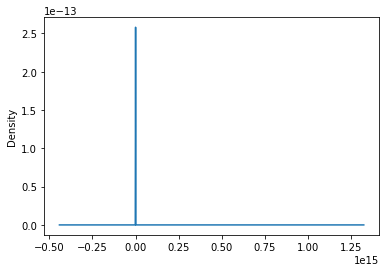

In [20]:
df['msisdn/number'].plot(kind='density')
print('This distribution has skew', df['msisdn/number'].skew())
print('This distribution has kurtosis', df['msisdn/number'].kurt())

In [21]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
top10 = df['handset_type'].value_counts().nlargest(10)

In [23]:
top10.head(10)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: handset_type, dtype: int64

In [24]:
new_df = pd.DataFrame()

In [25]:
new_df['handset_type'] = top10.index
new_df['count'] = top10.values

In [26]:
new_df.head()

,handset_type,count
0,Huawei B528S-23A,20324
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326


In [27]:
top10.index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

In [28]:
new_df.shape

(10, 2)

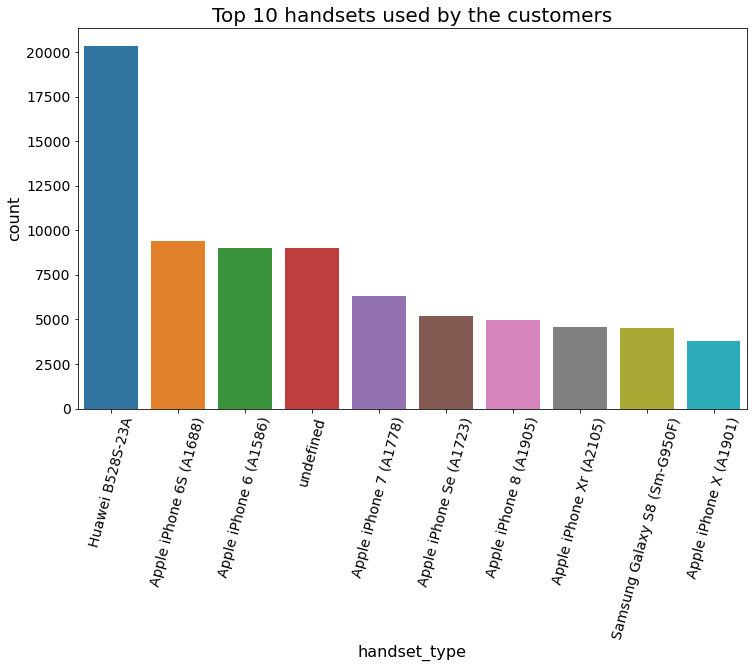

In [29]:
# plot graph for top10
pl.plot_bar(new_df, "handset_type", "count", 'Top 10 handsets used by the customers', 'handset_type', 'count')

In [30]:
top10

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: handset_type, dtype: int64

In [31]:
top_3_manuf = df['handset_manufacturer'].value_counts().nlargest(3)

In [32]:
top_3_manuf

Apple      60137
Samsung    40839
Huawei     34423
Name: handset_manufacturer, dtype: int64

In [33]:
new_df = pd.DataFrame()
new_df['handset_manufacturer'] = top_3_manuf.index
new_df['count'] = top_3_manuf.values

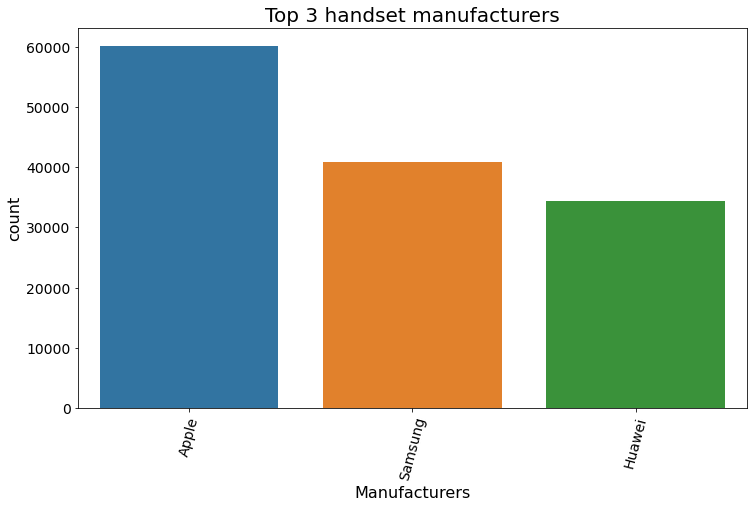

In [34]:
# plot graph for top10
pl.plot_bar(new_df, 'handset_manufacturer', 'count', 'Top 3 handset manufacturers', 'Manufacturers', 'count')

# plt.figure(figsize=(10,5))
# plt.bar(top_3_manuf.index, top_3_manuf.values)
# plt.xticks(rotation=0)

In [35]:
appCount = df.groupby('handset_manufacturer')['handset_type'].value_counts()['Apple'].nlargest(5)

In [36]:
new_df = pd.DataFrame()
new_df['Handset'] = appCount.index
new_df['count'] = appCount.values

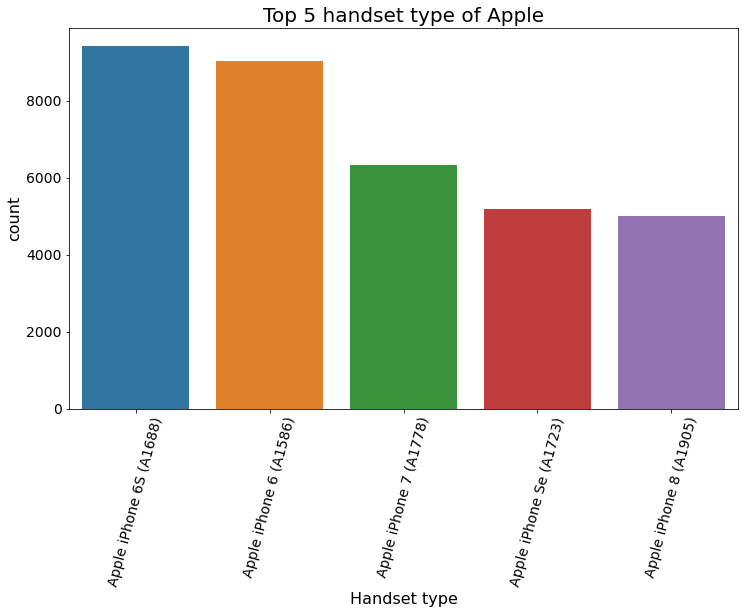

In [37]:
# plot graph for top 5
pl.plot_bar(new_df, 'Handset', 'count', 'Top 5 handset type of Apple', 'Handset type', 'count')

# plt.figure(figsize=(15,10))
# plt.bar(appCount.index, appCount.values)
# plt.xticks(rotation=0)

In [38]:
appCount

handset_type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: handset_type, dtype: int64

In [39]:
sam = df.groupby('handset_manufacturer')['handset_type'].value_counts()['Samsung'].nlargest(5)

In [40]:
new_df = pd.DataFrame()
new_df['Handset'] = sam.index
new_df['count'] = sam.values

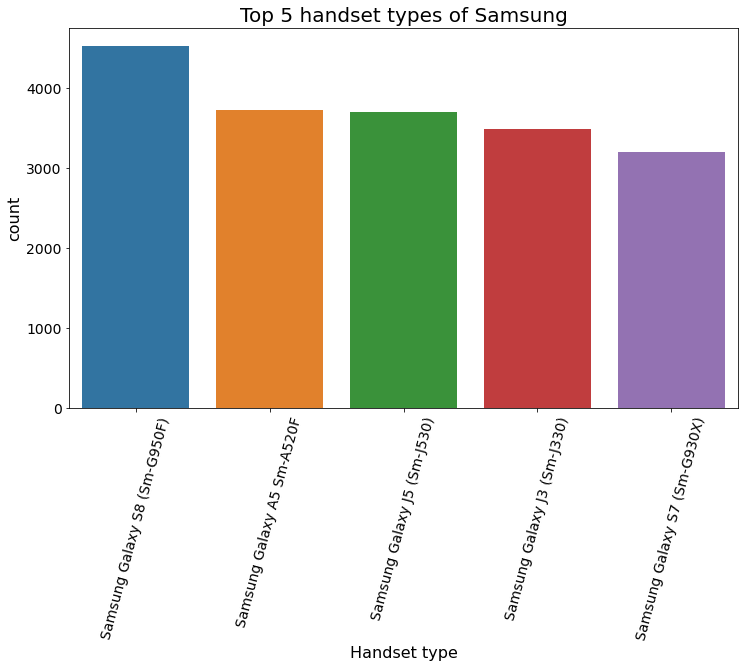

In [41]:
# plot graph for top10
pl.plot_bar(new_df, 'Handset', 'count', 'Top 5 handset types of Samsung', 'Handset type', 'count')

# plt.figure(figsize=(20,10))
# plt.bar(sam.index, sam.values)
# plt.xticks(rotation=0)

In [42]:
sam

handset_type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: handset_type, dtype: int64

In [43]:
huawCount = df.groupby('handset_manufacturer')['handset_type'].value_counts()['Huawei'].nlargest(5)

In [44]:
new_df = pd.DataFrame()
new_df['Handset'] = huawCount.index
new_df['count'] = huawCount.values

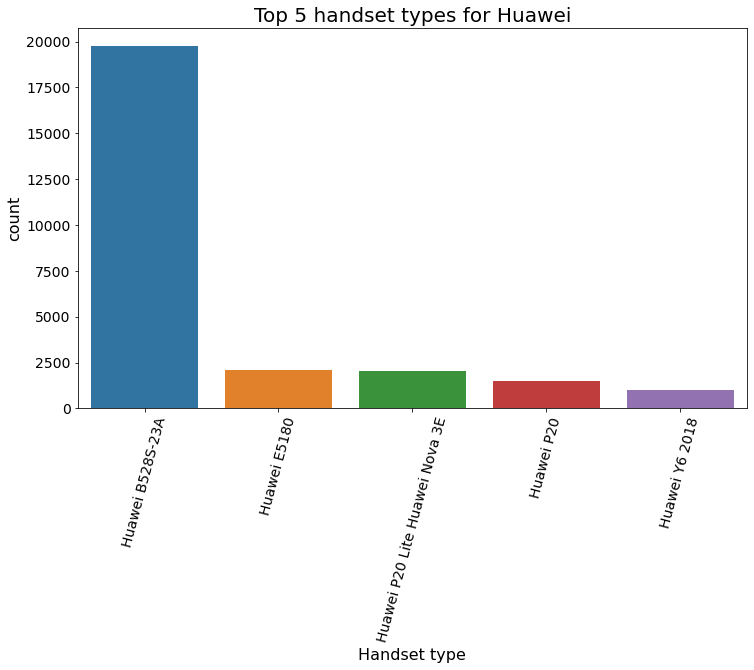

In [45]:
pl.plot_bar(new_df, 'Handset', 'count', 'Top 5 handset types for Huawei', 'Handset type', 'count')


In [46]:
huawCount

handset_type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: handset_type, dtype: int64

Task 1.1
Aggregate per user the following information in the column 

In [47]:
# number of xDR sessions
df.groupby('msisdn/number')['bearer_id'].count().nlargest(10)

msisdn/number
3.366371e+10    1067
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360313e+10      12
3.360452e+10      12
Name: bearer_id, dtype: int64

In [48]:
# Session Duration
df.groupby('msisdn/number')['dur._(ms)'].sum().nlargest(10)

msisdn/number
3.366371e+10    360.751900
3.362578e+10     14.843524
3.362632e+10     12.989967
3.361489e+10     12.871815
3.376054e+10     11.266070
3.366716e+10     10.296854
3.365973e+10     10.074836
3.367588e+10      9.989046
3.360313e+10      9.070301
3.360452e+10      8.610934
Name: dur._(ms), dtype: float64

In [49]:
#  total download (DL) 
df.groupby('msisdn/number')[['total_dl_(bytes)', 'total_ul_(bytes)']].sum().nlargest(10, 'total_dl_(bytes)')

,total_dl_(bytes),total_ul_(bytes)
msisdn/number,,
3.366371e+10,871.532016,850.924563
3.362632e+10,14.549725,13.786199
3.361489e+10,14.119849,13.358777
3.362578e+10,14.080649,13.758728
3.365973e+10,12.667924,12.471681
3.367588e+10,12.624149,11.596695
3.376054e+10,12.563986,12.598300
3.376041e+10,10.340968,9.788511
3.366716e+10,10.153094,10.513863


In [50]:
#  total upload (UL) 
df.groupby('msisdn/number')[['total_dl_(bytes)','total_ul_(bytes)']].sum().nlargest(10, 'total_ul_(bytes)')

,total_dl_(bytes),total_ul_(bytes)
msisdn/number,,
3.366371e+10,871.532016,850.924563
3.362632e+10,14.549725,13.786199
3.362578e+10,14.080649,13.758728
3.361489e+10,14.119849,13.358777
3.376054e+10,12.563986,12.598300
3.365973e+10,12.667924,12.471681
3.367588e+10,12.624149,11.596695
3.366716e+10,10.153094,10.513863
3.376041e+10,10.340968,9.788511


In [51]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other'] = df["other_dl_(bytes)"]+df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [52]:
df.groupby('msisdn/number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().nlargest(20, 'total_data')

,social_media,google,email,youtube,gaming,other,total_data
msisdn/number,,,,,,,
3.366371e+10,11799.485900,1961.566656,1965.681459,1970.431043,1964.374391,1958.803099,1722.456579
3.362632e+10,198.215265,33.081689,33.271028,32.871771,33.163459,33.146157,28.335924
3.362578e+10,186.260784,31.240450,31.543640,32.180911,31.648295,31.455805,27.839376
3.361489e+10,189.513730,30.837854,31.682405,31.637364,31.279496,30.960579,27.478626
3.376054e+10,161.515524,27.801567,27.813994,27.867910,28.124151,26.633111,25.162286
3.365973e+10,178.744675,28.798592,28.747095,28.855927,29.162047,29.082457,25.139605
3.367588e+10,165.181127,26.848767,27.188154,27.429203,27.405374,28.058608,24.220844
3.366716e+10,146.123721,24.079428,24.038916,24.003094,23.473835,23.517789,20.666957
3.376041e+10,124.652370,21.957881,21.680592,22.234531,22.591910,21.869924,20.129479


In [54]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
pl.plot_heatmap(df, 'Corrlation between variables')

KeyboardInterrupt: 

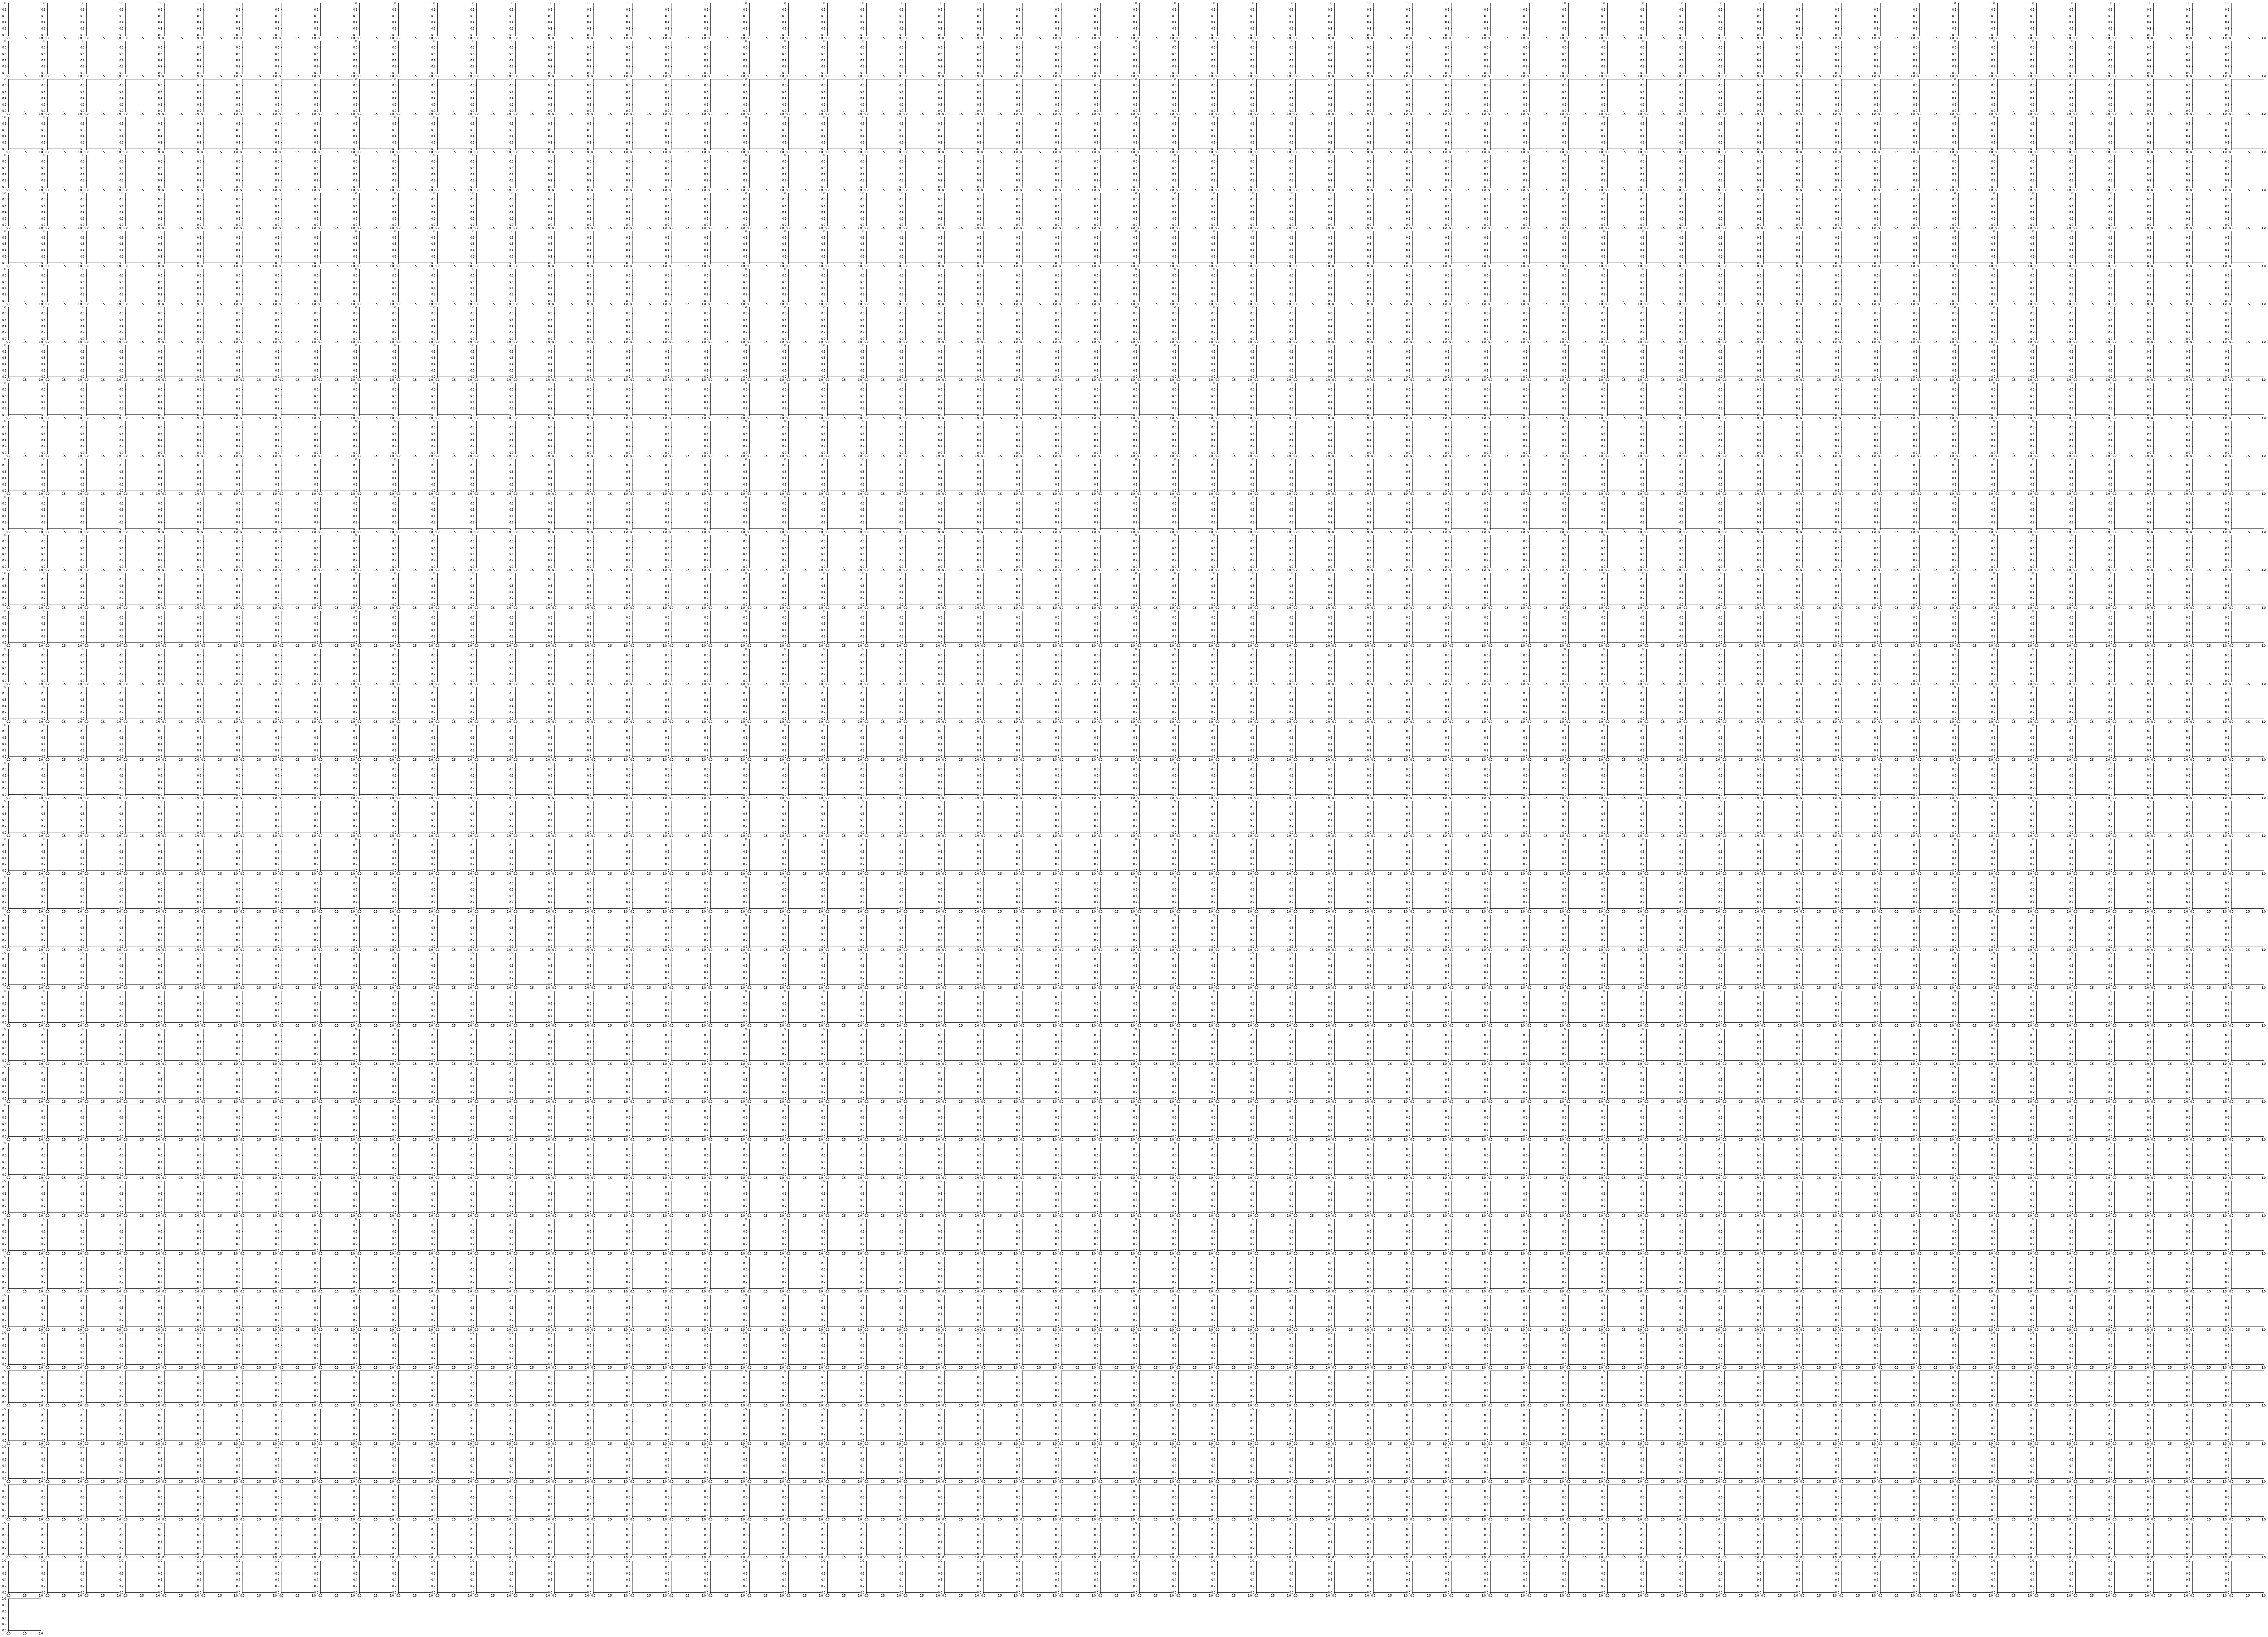

In [110]:
# TODO
# sns.pairplot(df)